#1.Introduction

Firstly, I will prepare the data (handwritten digits images) then i will focus on the image normalization over the train and test data.Also on modeling and evaluation.

This Notebook follows three main parts:
*   The data preparation
*   The CNN modeling and evaluation
*   The results prediction 

Here. I have done the following things:
*   Image normalization
*   L2 regularization
*   built a gallery of 25 misclassified images








In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

#2.Data Preparation

##2.1.Load Data

In [3]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


##2.2. Reshape Data

In [0]:
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))

In [5]:
print(trainX.shape)

(60000, 28, 28, 1)


##2.3. Normalization

Performed a grayscale normalization.Getting the values betweeen 0 to 1.

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

##2.4. Label Encoding

Encoding the labels to one hot encoders

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
trainy = np_utils.to_categorical(trainy, 10)
testy = np_utils.to_categorical(testy, 10)

#3.Building the Model

In [8]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3)) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3)) # 22
model.add(Activation('relu'))
#model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(10, 1, 1)) # 11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3)) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3)) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1)) #7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3,3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1,1))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  import sys


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 10)        0         
__________

###Below, it shows the train mean and standard deviation .Also test mean and standard deviation between the pixels.Distribution summary.

In [9]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

Statistics train=0.131 (0.308), test=0.133 (0.310)


###Here, we are doing Image Normalization

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [0]:
datagen.fit(trainX)
datagen.fit(testX)

In [12]:
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

(64, 28, 28, 1) 0.0030057966 0.9989068
(60000, 28, 28, 1) -0.0059719905 0.99235606


In [0]:
#train_generator = datagen.flow(trainX, trainy, batch_size=128, shuffle=False)

In [0]:
#validation_generator = datagen.flow(testX, testy, batch_size=128, shuffle=False)

<b>Saving the models in a directory in the google drive</b>

In [15]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [16]:
pwd

'/content'

<b> setting the callbacks/checkpoints</b>

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/eva5/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
# for modelLayer in model.layers:
#     print(modelLayer.get_weights())

##3.1.Regualrizing the model with L2 Regularization

In [0]:
import numpy as np
def compute_cost_with_L2_regularization(Y_test,y_pred):
  squared_weight = 0
  for modelLayer in model.layers:
    #print(modelLayer.get_weights())
    #print(np.shape(modelLayer.get_weights()))
    #print(modelLayer.get_weights())
    #print(modelLayer.get_weights()**2)
    #squared_weight =  squared_weight + np.sum(np.square(modelLayer.get_weights()))   
    squared_weight = squared_weight + np.sum(np.sum(np.sum(np.square(modelLayer.get_weights()))))
  print(squared_weight)

  lambda_variable = 1e-4
  L2_regularization_cost = (lambda_variable * squared_weight)/(2*128)
  Loss = keras.losses.categorical_crossentropy(Y_test,y_pred) + L2_regularization_cost
  return Loss



##4. Compiling the Model

In [20]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round((0.003) * 1/(1 + 0.319 * epoch), 10)

model.compile(loss=compute_cost_with_L2_regularization, optimizer=Adam(lr=0.003), metrics=['accuracy'])

273.00924134254456


In [0]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=200 ,
#         epochs=50,
#         validation_data=validation_generator,
#         callbacks=[checkpoint],
#         validation_steps=800)

In [0]:
epochs = 40 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 128

In [23]:
np.ceil(trainX.shape[0] / batch_size)+1

470.0

In [24]:
470*128

60160

##5. Fit the Model

In [25]:
model.fit_generator(datagen.flow(trainX, trainy, batch_size=batch_size,shuffle=False),
                              epochs = epochs, validation_data = datagen.flow(testX, testy, batch_size=batch_size,shuffle=False),
                              verbose = 1, steps_per_epoch=np.ceil(trainX.shape[0] / batch_size)
                              , callbacks=[checkpoint],validation_steps=np.ceil(testX.shape[0]/batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
469/469 [==============================] - 13s 27ms/step - loss: 0.3708 - acc: 0.8825 - val_loss: 0.0816 - val_acc: 0.9741

Epoch 00001: val_acc improved from -inf to 0.97410, saving model to /content/gdrive/My Drive/eva5/epochs:001-val_acc:0.974.hdf5
Epoch 2/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1066 - acc: 0.9670 - val_loss: 0.0534 - val_acc: 0.9826

Epoch 00002: val_acc improved from 0.97410 to 0.98260, saving model to /content/gdrive/My Drive/eva5/epochs:002-val_acc:0.983.hdf5
Epoch 3/40
469/469 [==============================] - 8s 17ms/step - loss: 0.0820 - acc: 0.9736 - val_loss: 0.0435 - val_acc: 0.9847

Epoch 00003: val_acc improved from 0.98260 to 0.98470, saving model to /content/gdrive/My Drive/eva5/epochs:003-val_acc:0.985.hdf5
Epoch 4/40
469/469 [==============================] - 8s 17ms/step - loss: 0.0753 - acc: 0.9771 - val_loss: 0.0398 - val_acc: 0.9872

Epoch 00004: val_acc impr

In [0]:
model.load_weights('/content/gdrive/My Drive/eva5/epochs:035-val_acc:0.993.hdf5')

##6.Evaluate the model

In [0]:
validation_data = datagen.flow(testX, testy, batch_size=batch_size,shuffle=False)

In [0]:
Y_pred = model.predict_generator(validation_data, steps=np.ceil(testX.shape[0]/batch_size), verbose=0)
y_pred = np.argmax(Y_pred, axis=1) 


###Built a confusion matrix

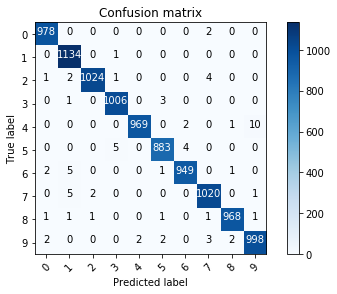

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
#Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testy,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


In [36]:
#y_hat = model.predict(testX)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(testy, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 978    0    0    0    0    0    0    2    0    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    2 1024    1    0    0    0    4    0    0]
 [   0    1    0 1006    0    3    0    0    0    0]
 [   0    0    0    0  969    0    2    0    1   10]
 [   0    0    0    5    0  883    4    0    0    0]
 [   2    5    0    0    0    1  949    0    1    0]
 [   0    5    2    0    0    0    0 1020    0    1]
 [   1    1    1    0    0    1    0    1  968    1]
 [   2    0    0    0    2    2    0    3    2  998]]


In [37]:

d = {'pred': np.argmax(Y_pred,axis=1), 'true': np.argmax(testy,axis=1)} #axis=1!important!
df = pd.DataFrame(data=d)

#looking at wrong predicted values(For 1! you can change it.)
#array1 = np.array(df[(df.pred != df.true) & (df.true==1)].index)
#print(array1)

# shows total mistakes
df2 = df[(df.pred != df.true)]
df2

df2.shape

(71, 2)

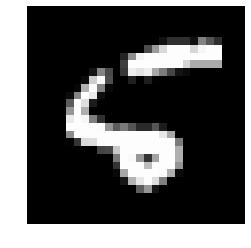

In [38]:

plt.imshow(testX[8].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

##7.Creating the image gallery for 25 misclassified images

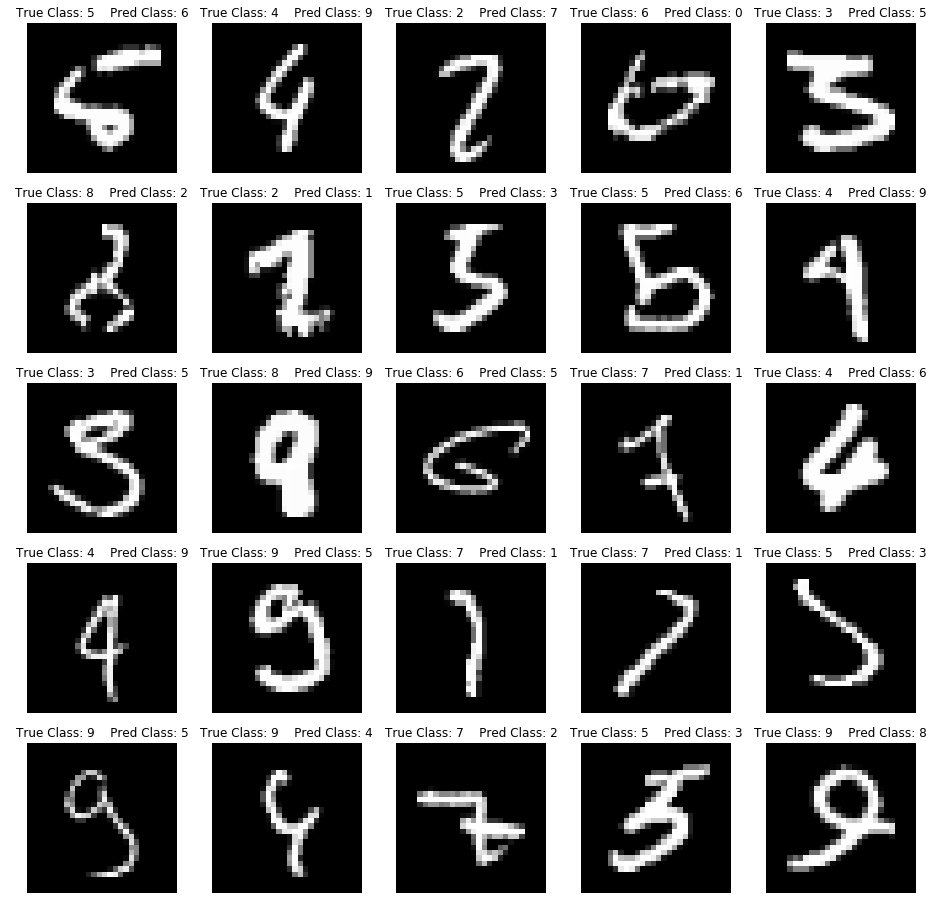

In [39]:

plt.figure(figsize = (16,16))

for i in range(25):
    plt.subplot(5, 5,i+1)
    img = testX[df2.index[i]]
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("True Class: " + str(df2["true"].iloc[i])+"    Pred Class: " + str(df2["pred"].iloc[i]))
    plt.axis('off')
    
plt.show()

In [0]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors =testX[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 5
    ncols = 5
    plt.figure(figsize = (25,25))
    #fig, ax = plt.subplots(2,3)
    for row in range(nrows):
        for col in range(ncols):
            plt.subplot(5,5,n+1)
            error = errors_index[n]
            plt.imshow((img_errors[error]).reshape((28,28)))
            plt.title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)


# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 25 errors 
most_important_errors = sorted_dela_errors[-25:]

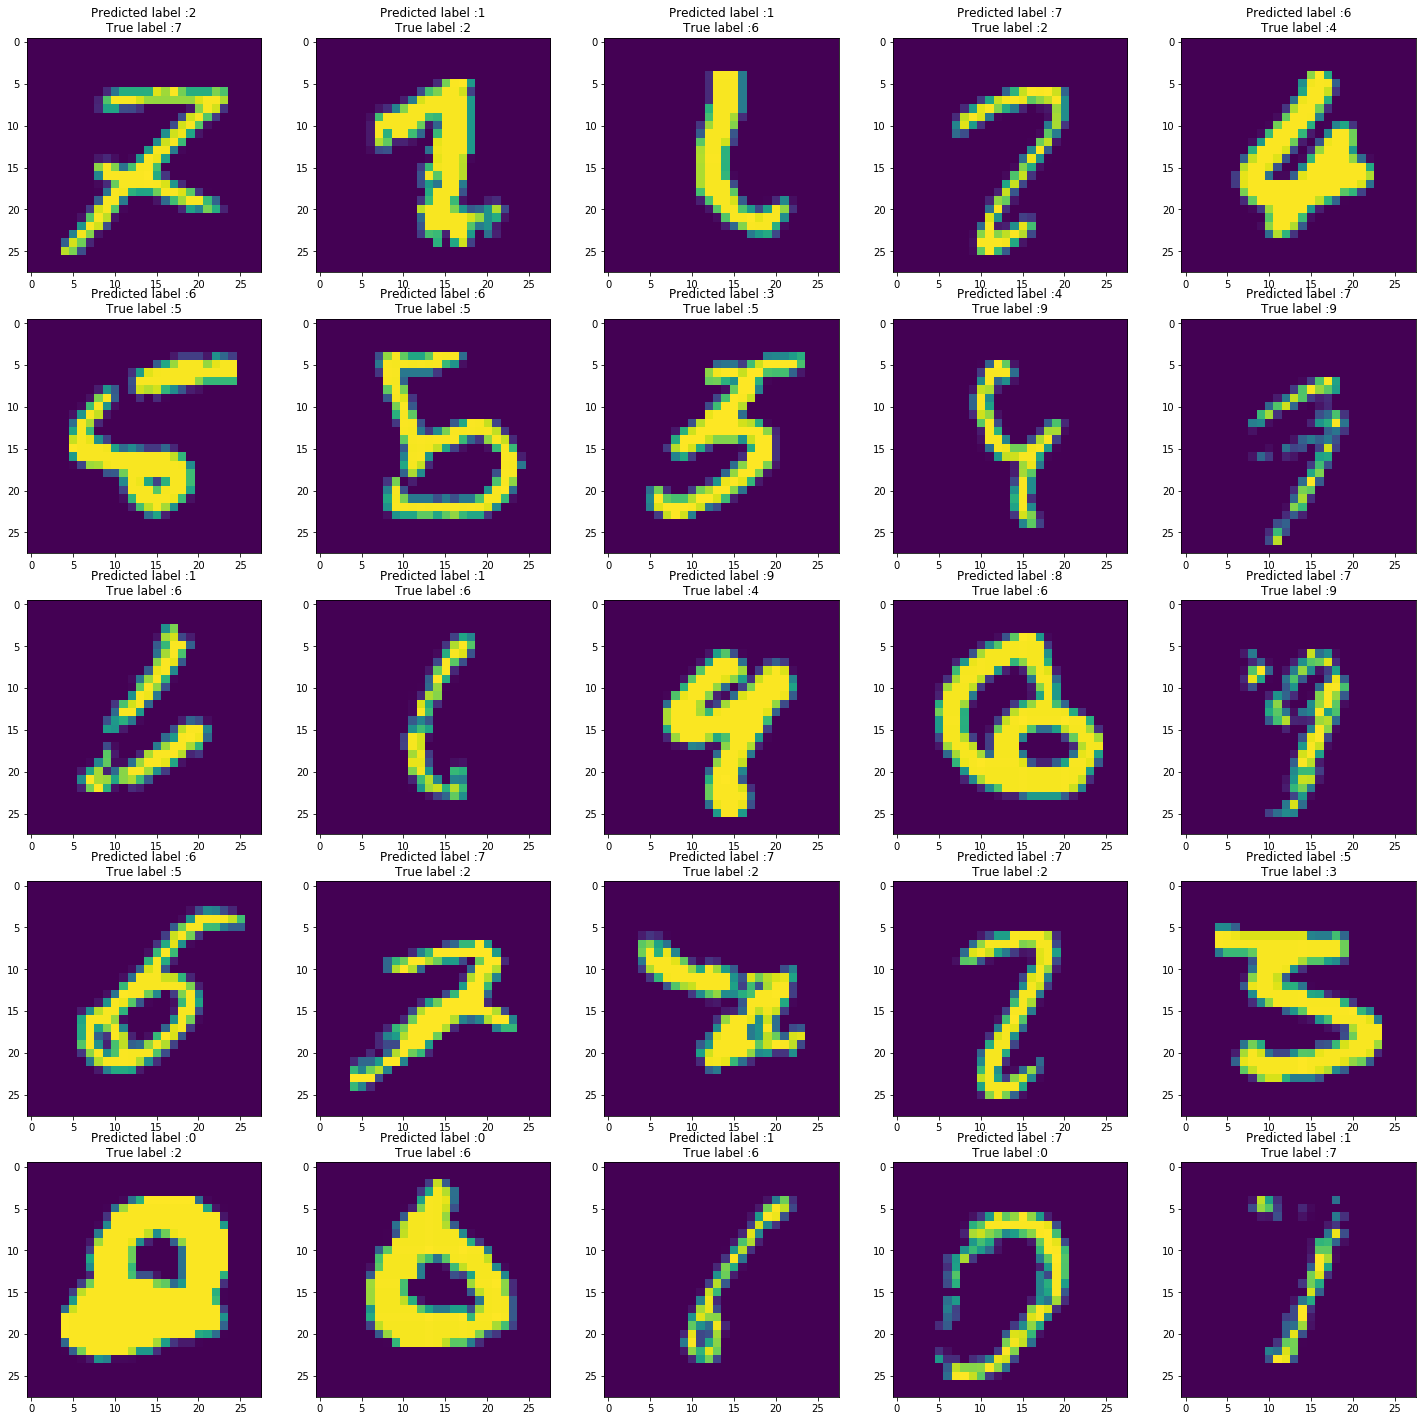

In [41]:
# Show the top 25 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)